<a href="https://colab.research.google.com/github/yeswhos/COMP5400M-Bio-inspired-Computing/blob/master/CW2/Backpropagation%20on%20the%20Iris%20data%20set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP5400 - Tensorflow Demo</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps, University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

This notebook demonstrates the use of keras. We will first use it to create a multi-layer perceptron that can classify the iris data set.

In [0]:
# first check if all the prerequisites are there.
import tensorflow as tf
from tensorflow.keras import layers


If the previous cells came through, then all the important stuff has been installed on your machine. Now let's process the iris data set and create a 1-of-3 coding.

Load data file from google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')
filepath = "drive/My Drive/Bio/iris.data"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
inputs  = []
outputs = []
iris = []

d = {}
d['Iris-setosa\n']     = [1., 0., 0.]
d['Iris-versicolor\n'] = [0., 1., 0.]
d['Iris-virginica\n']  = [0., 0., 1.]

# with open('iris.data') as f:
with open(filepath) as f:
    lines=f.readlines()
    for line in lines:
        items=line.split(',')
        iris.append(items)
        if len(items) == 5:
            inp =  [float(x) for x in items[0:4] ]
            inputs.append(inp)
            out = d[items[4]]
            outputs.append(out)
            
print( len(inputs), 'input patterns', len(outputs), 'output patterns')

150 input patterns 150 output patterns


In [4]:
print(iris)

[['5.1', '3.5', '1.4', '0.2', 'Iris-setosa\n'], ['4.9', '3.0', '1.4', '0.2', 'Iris-setosa\n'], ['4.7', '3.2', '1.3', '0.2', 'Iris-setosa\n'], ['4.6', '3.1', '1.5', '0.2', 'Iris-setosa\n'], ['5.0', '3.6', '1.4', '0.2', 'Iris-setosa\n'], ['5.4', '3.9', '1.7', '0.4', 'Iris-setosa\n'], ['4.6', '3.4', '1.4', '0.3', 'Iris-setosa\n'], ['5.0', '3.4', '1.5', '0.2', 'Iris-setosa\n'], ['4.4', '2.9', '1.4', '0.2', 'Iris-setosa\n'], ['4.9', '3.1', '1.5', '0.1', 'Iris-setosa\n'], ['5.4', '3.7', '1.5', '0.2', 'Iris-setosa\n'], ['4.8', '3.4', '1.6', '0.2', 'Iris-setosa\n'], ['4.8', '3.0', '1.4', '0.1', 'Iris-setosa\n'], ['4.3', '3.0', '1.1', '0.1', 'Iris-setosa\n'], ['5.8', '4.0', '1.2', '0.2', 'Iris-setosa\n'], ['5.7', '4.4', '1.5', '0.4', 'Iris-setosa\n'], ['5.4', '3.9', '1.3', '0.4', 'Iris-setosa\n'], ['5.1', '3.5', '1.4', '0.3', 'Iris-setosa\n'], ['5.7', '3.8', '1.7', '0.3', 'Iris-setosa\n'], ['5.1', '3.8', '1.5', '0.3', 'Iris-setosa\n'], ['5.4', '3.4', '1.7', '0.2', 'Iris-setosa\n'], ['5.1', '3.7

In [0]:
import numpy as np
total = np.array(inputs)
# print(total)
set_sepal_len = total[:50:,0]
set_sepal_wid = total[:50:,1]
set_petal_len = total[:50:,2]
set_petal_wid = total[:50:,3]

versi_sepal_len = total[50:100:,0]
versi_sepal_wid = total[50:100:,1]
versi_petal_len = total[50:100:,2]
versi_petal_wid = total[50:100:,3]

virgin_sepal_len = total[100:150:,0]
virgin_sepal_wid = total[100:150:,1]
virgin_petal_len = total[100:150:,2]
virgin_petal_wid = total[100:150:,3]



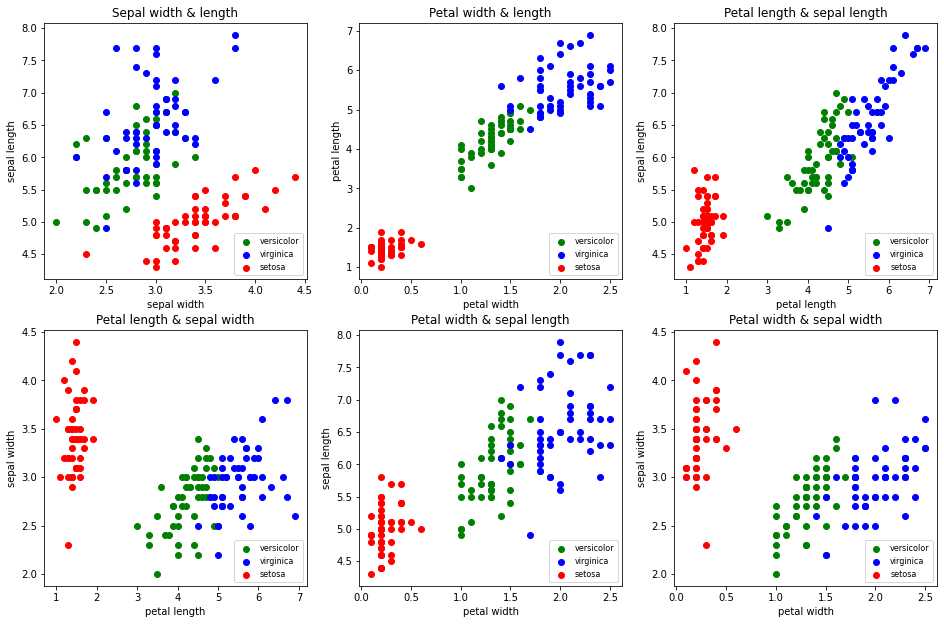

In [6]:
from pylab import *
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.subplot(3, 3, 1)
plt.title("Sepal width & length")
plt.xlabel("sepal width")
plt.ylabel("sepal length")
p1 = plt.scatter(versi_sepal_wid, versi_sepal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_sepal_wid, virgin_sepal_len, c = 'b', marker = "o")
p3 = plt.scatter(set_sepal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 2)
plt.title("Petal width & length")
plt.xlabel("petal width")
plt.ylabel("petal length")
p4 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p5 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'b', marker = "o")
p6 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
#plt.legend([p4, p5, p6], ['versicolor', 'virginica', 'setosa'], loc = 'lower right')

plt.subplot(3, 3, 3)
plt.title("Petal length & sepal length")
plt.xlabel("petal length")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_len, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 4)
plt.title("Petal length & sepal width")
plt.xlabel("petal length")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_len, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_len, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_len, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 5)
plt.title("Petal width & sepal length")
plt.xlabel("petal width")
plt.ylabel("sepal length")
p7 = plt.scatter(versi_petal_wid, versi_sepal_len, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_len, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})

plt.subplot(3, 3, 6)
plt.title("Petal width & sepal width")
plt.xlabel("petal width")
plt.ylabel("sepal width")
p7 = plt.scatter(versi_petal_wid, versi_sepal_wid, c = 'g', marker = "o")
p8 = plt.scatter(virgin_petal_wid, virgin_sepal_wid, c = 'b', marker = "o")
p9 = plt.scatter(set_petal_wid, set_sepal_wid, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p1, p2, p3], ['versicolor', 'virginica', 'setosa'], loc = 'lower right', prop = {'size':8})
plt.show()

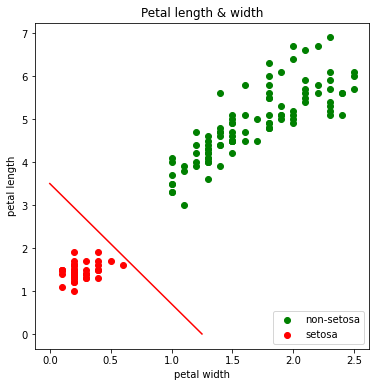

In [7]:
plt.figure(figsize=(6, 6))
plt.title("Petal length & width")
plt.xlabel("petal width")
plt.ylabel("petal length")
p1 = plt.scatter(versi_petal_wid, versi_petal_len, c = 'g', marker = "o")
p2 = plt.scatter(virgin_petal_wid, virgin_petal_len, c = 'g', marker = "o")
p3 = plt.scatter(set_petal_wid, set_petal_len, c = 'r', marker = "o")
plt.tick_params(axis='both', which = 'major', labelsize=10)
plt.legend([p2, p3], ['non-setosa', 'setosa'], loc = 'lower right')
x = [0, 3.5]
y = [1.25, 0]
plt.plot(y, x, 'r')
plt.show()

In [8]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)    # iris.data包含一个(150, 4)的数据，设置列名为iris.feature_names
df['label'] = iris.target    # iris.target为类别标签(150, 1)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
data = np.array(df.iloc[:100, [2, 3, -1]])
X_setoa, y_setoa = data[:,:-1], data[:,-1]

In [0]:
data_1 = np.array(df.iloc[50:150, [2, 3, -1]])
X_virginica, y_virginica = data_1[:,:-1], data_1[:,-1]

In [0]:
data_total = np.array(df.iloc[:, [2, 3, -1]])

In [77]:
print(len(y_virginica))

100


In [0]:
#from goto import with_goto
# import tensorflow.compat.v1 as tf
# tf.compat.v1.disable_eager_execution() 
import tensorflow as tf
class Perceptron(object):
    def __init__(self, input_feature_num, activation=None):
        self.activation = activation if activation else self.sign
        self.w = [0.0] * input_feature_num
        #self.b = -200000.0
        self.b = 0.0

    def sign(self, z):
        # 阶跃激活函数:
        # sign(z) = 1 if z > 0 
        # sign(z) = 0 otherwise
        return int(z>0)
    def predict(self, x):
        # 预测输出函数
        # y_hat = f(wx + b)
        return self.activation(
            np.dot(self.w, x) + self.b)
    
    def fit(self, x_train, y_train, iteration=10, learning_rate=0.1):
        # 训练函数
        for _ in range(iteration):
            # counter = 0
            for x, y in zip(x_train, y_train):
                y_hat = self.predict(x)
                # print(y)
                # print(y_hat)
                # loss = tf.Variable((y - y_hat) ** 2, name = 'loss')
                # init = tf.global_variables_initializer()
                # with tf.Session() as session:
                #   session.run(init)
                #   print("loss", session.run(loss))
                # if(a == 0.0):
                #   counter += 1  
                self._update_weights(x, y, y_hat, learning_rate)
                #count += 1
            # if(counter > 90):
            #     # print(count)
            #     # print(counter)
            #     print(self.__str__())
            #     return
        print(self)
    # def _loss_function(n_x, n_y):
    #     loss = tf.Variable((n_x - n_y) ** 2, name = 'loss')
    #     init = tf.global_variables_initializer()
    #     with tf.Session() as session:
    #       session.run(init)
    #       # print(session.run(loss))
    #       return session.run(loss)

    
    def _update_weights(self, x, y, y_hat, learning_rate):
        # 权重更新, 对照公式查看
        delta = y - y_hat
        self.w = np.add(self.w,np.multiply(learning_rate * delta, x))
        self.b += learning_rate * delta
    
    def __str__(self):
        return 'weights: {}\tbias: {}'.format(self.w, self.b)

In [133]:
perceptron_setoa = Perceptron(input_feature_num=X_setoa.shape[1])
perceptron_setoa.fit(X_setoa, y_setoa, iteration=100, learning_rate=0.1)

weights: [0.06 0.08]	bias: -0.2


In [119]:
perceptron_virginica = Perceptron(input_feature_num=X_virginica.shape[1])
perceptron_virginica.fit(X_virginica, y_virginica, iteration=1000, learning_rate=0.1)

weights: [52478.2        18440.13999999]	bias: -189729.29999940217


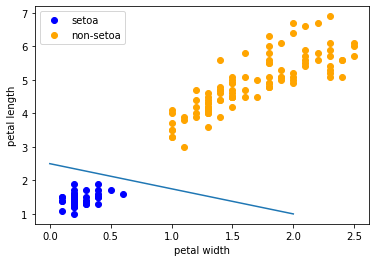

In [142]:
x_points = np.linspace(0, 2)
y_ = -(perceptron_setoa.w[0]*x_points + perceptron_setoa.b)/perceptron_setoa.w[1]
z_ = -(perceptron_setoa.w[0]*x_points + perceptron_setoa.b)/perceptron_setoa.w[1]
plt.plot(x_points, y_)

# plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.plot(data_total[:50, 1], data_total[:50, 0],'bo', color='blue', label='setoa')
plt.plot(data_total[50:150, 1],data_total[50:150, 0], 'bo', color='orange', label='non-setoa')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()

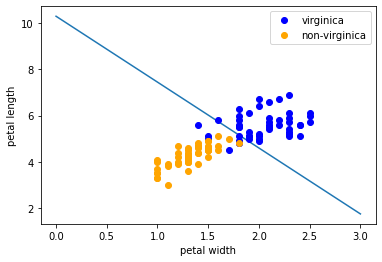

In [149]:
x_points = np.linspace(0,3)
# y_points = np.linspace(0,3)
y_ = -(perceptron_virginica.w[0]*x_points + perceptron_virginica.b)/perceptron_virginica.w[1]
# z_ = -(perceptron_setoa.w[0]*y_points + perceptron_setoa.b)/perceptron_setoa.w[1]
plt.plot(x_points, y_)
# plt.plot(y_points, z_)
# plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
# plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.plot(data_total[100:150, 1], data_total[100:150, 0],'bo', color='blue', label='virginica')
plt.plot(data_total[50:100, 1], data_total[50:100, 0],'bo', color='orange', label='non-virginica')
# plt.plot(data_total[50:100, 1],data_total[50:100, 0], 'bo', color='orange', label='versicolor')
# plt.plot(data_total[:50, 1],data_total[:50, 0], 'bo', color='green', label='setosa')
plt.xlabel('petal width')
plt.ylabel('petal length')
plt.legend()

In [0]:
import os
import sys
import time
import gzip
# import cPickle
# !pip install -q matplotlib-venn
import numpy

import theano
import theano.tensor as T


In [0]:
class HiddenLayer(object):
    def __init__(self, rng, input, n_in, n_out, W=None, b=None, activation=T.tanh):
         self.input = input   #类HiddenLayer的input即所传递进来的input

         """
         注释：
         代码要兼容GPU，则必须使用 dtype=theano.config.floatX,并且定义为theano.shared
         另外，W的初始化有个规则：如果使用tanh函数，则在-sqrt(6./(n_in+n_hidden))到sqrt(6./(n_in+n_hidden))之间均匀
         抽取数值来初始化W，若时sigmoid函数，则以上再乘4倍。
         """
         #如果W没有给定，即等于None，则根据上述的规则随机初始化。
         #加入这个判断的原因是：有时候我们可以用训练好的参数来初始化W，见我的上一篇文章。

         #用上面定义的W、b来初始化类HiddenLayer的W、b
         self.W = W
         self.b = b

        #隐含层的输出
         lin_output = T.dot(input, self.W) + self.b
         self.output = (
            lin_output if activation is None
            else activation(lin_output)
         )

        #隐含层的参数
         self.params = [self.W, self.b]

In [0]:
class LogisticRegression(object):
    def __init__(self, input, n_in, n_out):

#W大小是n_in行n_out列，b为n_out维向量。即：每个输出对应W的一列以及b的一个元素。  
        self.W = theano.shared(
            value=numpy.zeros(
                (n_in, n_out),
                dtype=theano.config.floatX
            ),
            name='W',
            borrow=True
        )

        self.b = theano.shared(
            value=numpy.zeros(
                (n_out,),
                dtype=theano.config.floatX
            ),
            name='b',
            borrow=True
        )

#input是(n_example,n_in)，W是（n_in,n_out）,点乘得到(n_example,n_out)，加上偏置b，
#再作为T.nnet.softmax的输入，得到p_y_given_x
#故p_y_given_x每一行代表每一个样本被估计为各类别的概率    
#PS：b是n_out维向量，与(n_example,n_out)矩阵相加，内部其实是先复制n_example个b，
#然后(n_example,n_out)矩阵的每一行都加b
        self.p_y_given_x = T.nnet.softmax(T.dot(input, self.W) + self.b)

#argmax返回最大值下标，因为本例数据集是MNIST，下标刚好就是类别。axis=1表示按行操作。
        self.y_pred = T.argmax(self.p_y_given_x, axis=1)

#params，LogisticRegression的参数     
        self.params = [self.W, self.b]

    def negative_log_likelihood(self, y):
        return -T.mean(T.log(self.p_y_given_x)[T.arange(y.shape[0]), y])

    def errors(self, y):
        if y.ndim != self.y_pred.ndim:
            raise TypeError(
                'y should have the same shape as self.y_pred',
                ('y', y.type, 'y_pred', self.y_pred.type)
            )
        if y.dtype.startswith('int'):
            return T.mean(T.neq(self.y_pred, y))
        else:
            raise NotImplementedError()

In [0]:
class MLP(object):
    def __init__(self, rng, input, n_in, n_hidden, n_out):
        
        self.hiddenLayer = HiddenLayer(
            rng=rng,
            input=input,
            n_in=n_in,
            n_out=n_hidden,
            activation=T.tanh
        )

#将隐含层hiddenLayer的输出作为分类层logRegressionLayer的输入，这样就把它们连接了
        self.logRegressionLayer = LogisticRegression(
            input=self.hiddenLayer.output,
            n_in=n_hidden,
            n_out=n_out
        )

#规则化项：常见的L1、L2_sqr
        self.L1 = (
            abs(self.hiddenLayer.W).sum()
            + abs(self.logRegressionLayer.W).sum()
        )

        self.L2_sqr = (
            (self.hiddenLayer.W ** 2).sum()
            + (self.logRegressionLayer.W ** 2).sum()
        )

#损失函数Nll（也叫代价函数）
        self.negative_log_likelihood = (
            self.logRegressionLayer.negative_log_likelihood
        )

#误差      
        self.errors = self.logRegressionLayer.errors

#MLP的参数
        self.params = self.hiddenLayer.params + self.logRegressionLayer.params
        # end-snippet-3


In [0]:
def load_data(dataset):
    # dataset是数据集的路径，程序首先检测该路径下有没有MNIST数据集，没有的话就下载MNIST数据集
    #这一部分就不解释了，与softmax回归算法无关。
    data_dir, data_file = os.path.split(dataset)
    if data_dir == "" and not os.path.isfile(dataset):
        # Check if dataset is in the data directory.
        new_path = os.path.join(
            os.path.split(__file__)[0],
            "..",
            "data",
            dataset
        )
        if os.path.isfile(new_path) or data_file == 'mnist.pkl.gz':
            dataset = new_path

    if (not os.path.isfile(dataset)) and data_file == 'mnist.pkl.gz':
        import urllib
        origin = (
            'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
        )
#        print 'Downloading data from %s' % origin
        urllib.urlretrieve(origin, dataset)

#    print '... loading data'
#以上是检测并下载数据集mnist.pkl.gz，不是本文重点。下面才是load_data的开始
    
#从"mnist.pkl.gz"里加载train_set, valid_set, test_set，它们都是包括label的
#主要用到python里的gzip.open()函数,以及 cPickle.load()。
#‘rb’表示以二进制可读的方式打开文件
    f = gzip.open(dataset, 'rb')
    train_set, valid_set, test_set = cPickle.load(f)
    f.close()
   

#将数据设置成shared variables，主要时为了GPU加速，只有shared variables才能存到GPU memory中
#GPU里数据类型只能是float。而data_y是类别，所以最后又转换为int返回
    def shared_dataset(data_xy, borrow=True):
        data_x, data_y = data_xy
        shared_x = theano.shared(numpy.asarray(data_x,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        shared_y = theano.shared(numpy.asarray(data_y,
                                               dtype=theano.config.floatX),
                                 borrow=borrow)
        return shared_x, T.cast(shared_y, 'int32')


    test_set_x, test_set_y = shared_dataset(test_set)
    valid_set_x, valid_set_y = shared_dataset(valid_set)
    train_set_x, train_set_y = shared_dataset(train_set)

    rval = [(train_set_x, train_set_y), (valid_set_x, valid_set_y),
            (test_set_x, test_set_y)]
    return rval

In [0]:
def test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0001, n_epochs=10,
             dataset='mnist.pkl.gz', batch_size=20, n_hidden=500):
    """
注释：
learning_rate学习速率，梯度前的系数。
L1_reg、L2_reg：正则化项前的系数，权衡正则化项与Nll项的比重
代价函数=Nll+L1_reg*L1或者L2_reg*L2_sqr
n_epochs：迭代的最大次数（即训练步数），用于结束优化过程
dataset：训练数据的路径
n_hidden:隐藏层神经元个数
batch_size=20，即每训练完20个样本才计算梯度并更新参数
   """

#加载数据集，并分为训练集、验证集、测试集。
    datasets = load_data(dataset)
    train_set_x, train_set_y = datasets[0]
    valid_set_x, valid_set_y = datasets[1]
    test_set_x, test_set_y = datasets[2]


#shape[0]获得行数，一行代表一个样本，故获取的是样本数，除以batch_size可以得到有多少个batch
    n_train_batches = train_set_x.get_value(borrow=True).shape[0] / batch_size
    n_valid_batches = valid_set_x.get_value(borrow=True).shape[0] / batch_size
    n_test_batches = test_set_x.get_value(borrow=True).shape[0] / batch_size

    ######################
    # BUILD ACTUAL MODEL #
    ######################
    #print '... building the model'

#index表示batch的下标，标量
#x表示数据集
#y表示类别，一维向量
    index = T.lscalar()  
    x = T.matrix('x') 
    y = T.ivector('y')  
                       

    rng = numpy.random.RandomState(1234)
#生成一个MLP，命名为classifier
    classifier = MLP(
        rng=rng,
        input=x,
        n_in=28 * 28,
        n_hidden=n_hidden,
        n_out=10
    )

#代价函数，有规则化项
#用y来初始化，而其实还有一个隐含的参数x在classifier中
    cost = (
        classifier.negative_log_likelihood(y)
        + L1_reg * classifier.L1
        + L2_reg * classifier.L2_sqr
    )


#这里必须说明一下theano的function函数，givens是字典，其中的x、y是key，冒号后面是它们的value。
#在function被调用时，x、y将被具体地替换为它们的value，而value里的参数index就是inputs=[index]这里给出。
#下面举个例子：
#比如test_model(1)，首先根据index=1具体化x为test_set_x[1 * batch_size: (1 + 1) * batch_size]，
#具体化y为test_set_y[1 * batch_size: (1 + 1) * batch_size]。然后函数计算outputs=classifier.errors(y)，
#这里面有参数y和隐含的x，所以就将givens里面具体化的x、y传递进去。
    test_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: test_set_x[index * batch_size:(index + 1) * batch_size],
            y: test_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

    validate_model = theano.function(
        inputs=[index],
        outputs=classifier.errors(y),
        givens={
            x: valid_set_x[index * batch_size:(index + 1) * batch_size],
            y: valid_set_y[index * batch_size:(index + 1) * batch_size]
        }
    )

#cost函数对各个参数的偏导数值，即梯度，存于gparams
    gparams = [T.grad(cost, param) for param in classifier.params]
    
#参数更新规则
#updates[(),(),()....],每个括号里面都是(param, param - learning_rate * gparam)，即每个参数以及它的更新公式
    updates = [
        (param, param - learning_rate * gparam)
        for param, gparam in zip(classifier.params, gparams)
    ]

    train_model = theano.function(
        inputs=[index],
        outputs=cost,
        updates=updates,
        givens={
            x: train_set_x[index * batch_size: (index + 1) * batch_size],
            y: train_set_y[index * batch_size: (index + 1) * batch_size]
        }
    )


    ###############
    # 开始训练模型 #
    ###############
    #print '... training'
    


    patience = 10000  
    patience_increase = 2  
#提高的阈值，在验证误差减小到之前的0.995倍时，会更新best_validation_loss  
    improvement_threshold = 0.995  
#这样设置validation_frequency可以保证每一次epoch都会在验证集上测试。  
    validation_frequency = min(n_train_batches, patience / 2)
  

    best_validation_loss = numpy.inf
    best_iter = 0
    test_score = 0.
    start_time = time.clock()
    
#epoch即训练步数，每个epoch都会遍历所有训练数据
    epoch = 0
    done_looping = False


#下面就是训练过程了，while循环控制的时步数epoch，一个epoch会遍历所有的batch，即所有的图片。
#for循环是遍历一个个batch，一次一个batch地训练。for循环体里会用train_model(minibatch_index)去训练模型，
#train_model里面的updatas会更新各个参数。
#for循环里面会累加训练过的batch数iter，当iter是validation_frequency倍数时则会在验证集上测试，
#如果验证集的损失this_validation_loss小于之前最佳的损失best_validation_loss，
#则更新best_validation_loss和best_iter，同时在testset上测试。
#如果验证集的损失this_validation_loss小于best_validation_loss*improvement_threshold时则更新patience。
#当达到最大步数n_epoch时，或者patience<iter时，结束训练
    while (epoch < n_epochs) and (not done_looping):
        epoch = epoch + 1
        for minibatch_index in xrange(n_train_batches):#训练时一个batch一个batch进行的

            minibatch_avg_cost = train_model(minibatch_index)
            # 已训练过的minibatch数，即迭代次数iter
            iter = (epoch - 1) * n_train_batches + minibatch_index
#训练过的minibatch数是validation_frequency倍数，则进行交叉验证
            if (iter + 1) % validation_frequency == 0:
                # compute zero-one loss on validation set
                validation_losses = [validate_model(i) for i
                                     in xrange(n_valid_batches)]
                this_validation_loss = numpy.mean(validation_losses)

                print(
                    'epoch %i, minibatch %i/%i, validation error %f %%' %
                    (
                        epoch,
                        minibatch_index + 1,
                        n_train_batches,
                        this_validation_loss * 100.
                    )
                )
#当前验证误差比之前的都小，则更新best_validation_loss，以及对应的best_iter，并且在tsetdata上进行test
                if this_validation_loss < best_validation_loss:
                    if (
                        this_validation_loss < best_validation_loss *
                        improvement_threshold
                    ):
                        patience = max(patience, iter * patience_increase)

                    best_validation_loss = this_validation_loss
                    best_iter = iter

                    test_losses = [test_model(i) for i
                                   in xrange(n_test_batches)]
                    test_score = numpy.mean(test_losses)

                    print(('     epoch %i, minibatch %i/%i, test error of '
                           'best model %f %%') %
                          (epoch, minibatch_index + 1, n_train_batches,
                           test_score * 100.))
#patience小于等于iter，则终止训练
            if patience <= iter:
                done_looping = True
                break

    end_time = time.clock()
    print(('Optimization complete. Best validation score of %f %% '
           'obtained at iteration %i, with test performance %f %%') %
          (best_validation_loss * 100., best_iter + 1, test_score * 100.))
    print >> sys.stderr, ('The code for file ' +
                          os.path.split(__file__)[1] +
                          ' ran for %.2fm' % ((end_time - start_time) / 60.))

In [163]:
if __name__ == '__main__':
    test_mlp()

NameError: ignored

Now we build a network. A stack of layers is captured by the tf.keras.Sequential model.

In [0]:
# import numpy as np
import random
ids=random.sample(range(0,len(inputs)), 100) # generate 100 random ids
train_in = []
train_out=[]
for id in ids:
    train_in.append(inputs[id])
    train_out.append(outputs[id])
train_inputs  = np.array(train_in)
train_outputs = np.array(train_out)

val_input =[]
val_output=[]
validation_ids = list(set(range(0,len(inputs))) - set(ids))
for val_id in validation_ids:
    val_input.append(inputs[val_id])
    val_output.append(outputs[val_id])
val_inputs  = np.array(val_input)
val_outputs = np.array(val_output)


weights: [  7.9  -10.07]	bias: -12.399999999999972


In [0]:
print(train_outputs[10:15])

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [0]:

tf.disable_v2_behavior()
model = tf.keras.Sequential()
# an mlp with a given number of input nodes. Four input nodes, three output nodes 
nr_hidden = 5
nr_in     = 4
nr_out    = 3 
model.add(layers.Dense(nr_in,activation='relu'))
model.add(layers.Dense(nr_hidden, activation = 'sigmoid'))
model.add(layers.Dense(nr_out,activation='sigmoid'))
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.05),loss='mse',metrics=['accuracy'])

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Create training set and bring them into a numpy array form. Let's use a 100 patterns for training. Also, build a validation set.

Now train:

In [0]:
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_acc',min_delta=-0.01,patience=200,verbose=True,restore_best_weights=True)
callbacks=[earlystop]
history_model = model.fit(train_inputs,train_outputs,epochs=20000,batch_size=30,validation_data=(val_inputs,val_outputs),callbacks=callbacks)
#model.fit(train_inputs,train_outputs,epochs=500,batch_size=30, validation_data=(val_inputs, val_outputs))

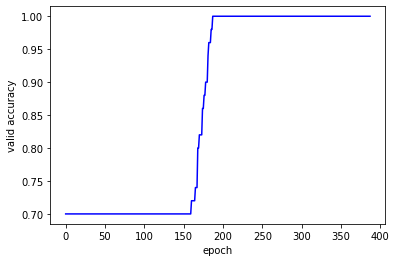

In [0]:
vla_accu=[]
vla_accu=history_model.history['val_acc']
vla_loss=[]
val_loss=history_model.history['val_loss']

Epochs=[]
i=0
for i in range(0,len(vla_accu)):
  Epochs.append(i)
  i += 1
# Sepal length with Petal length
plt.plot(Epochs,vla_accu,c='b',label="vlidation acc")
plt.xlabel('epoch')
plt.ylabel('valid accuracy')
# plt.legend()
plt.show()

In [0]:
w1 = tf.Variable(tf.random_normal(shape=[4]), name='w1')
w2 = tf.Variable(tf.random_normal(shape=[3]), name='w2')
saver = tf.train.Saver([w1,w2])
sess = tf.Session()

sess.run(tf.global_variables_initializer())
saver.save(sess, "drive/My Drive/Bio/model-1.ckpt")

'drive/My Drive/Bio/model-1.ckpt'

In [0]:
output = []
import tensorflow.compat.v1 as tf
with tf.Session() as sess:
  new_saver = tf.train.import_meta_graph('./drive/My Drive/Bio/model-1.ckpt.meta')
  new_saver.restore(sess, tf.train.latest_checkpoint('./drive/My Drive/Bio'))
  sess.run(tf.argmax(output,1), {val_inputs: val_outputs})


INFO:tensorflow:Restoring parameters from ./drive/My Drive/Bio/model-1.ckpt


TypeError: ignored

In [0]:
with tf.Session() as sess:    
    saver = tf.train.import_meta_graph('./drive/My Drive/Bio/model-1.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./drive/My Drive/Bio'))
    print(sess.run('w1:0'))


INFO:tensorflow:Restoring parameters from ./drive/My Drive/Bio/model-1.ckpt


FailedPreconditionError: ignored

In [0]:
model.summary()
print(model)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              multiple                  20        
_________________________________________________________________
dense_7 (Dense)              multiple                  25        
_________________________________________________________________
dense_8 (Dense)              multiple                  18        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [0]:
vla_loss = []
val_loss = history_model.history['val_loss']


In [0]:
model_setoa = []
model_setoa = model.predict(val_inputs[5:10])

In [0]:
model.predict(train_inputs)

In [0]:
print(train_out[5:10])

[[1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0]]


In [0]:
print(val_outputs[10:15])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
